* 统计假设检验是一套思路框架，用于决策观测数据是否偏离我们的期望，样本是否与总体显著相同。
* 什么情况下用T-test：


    * One-Sample T-test: 
            stats.ttest_1samp() Calculates the T-test for the 【mean】 of ONE group of scores.
    * Two-Sample T-test: 
            stats.ttest_ind()  Calculates the T-test for the 【means】 of TWO INDEPENDENT samples of scores.  
    * paired T-test:     
            stats.ttest_rel()  Calculates the T-test on TWO RELATED samples of scores

# Hypothesis Testing Basics

* __null hypothesis__: that assumes nothing interesting is going on between whatever variables you are testing.倾向"不变的“、=
* __alternative hypothesis__: that something interesting is going on.倾向”发生改变的“、≠


* 有了假设，选定某个显著性水平α：概率阈值，判断是否拒绝原假设，容错率。
* __p-value 是一个概率值，度量（拒绝原假设的）证据的充分程度，值越小，支持原假设的证据越少，越足以拒绝原假设__
  * 检验结果p-value 小于等于显著性水平，拒绝原假设，“显著”不同
  * 检验结果p-value 高于显著性水平，不拒绝原假设，“不显著”不同——同
  
* test statistic 检验统计量：它的值用于确定是否拒绝原假设


* **t 即对应t 分布，前提“总体标准差σ未知”，需要计算standard dev estimate**

## One-Sample T-Test
检验一个样本均值是否不同于总体均值。

To conduct a one sample t-test, we can the stats.ttest_1samp() function


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import math

我们故意构造两个均值不等的数据集，然后看看t-test是效果:

In [2]:
#构造数据:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18,mu =35,size=150000)
population_ages2 = stats.poisson.rvs(loc=18,mu =10,size=100000)
population_ages = np.concatenate((population_ages1,population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18,mu=30,size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18,mu=10,size=20)
minnesota_ages = np.concatenate((minnesota_ages1,minnesota_ages2))

print(population_ages.mean())  # 总体年龄均值
print(minnesota_ages.mean())   # 明尼苏达州选民的年龄均值



43.000112
39.26


* 原假设H_0: 样本均值与总体均值近似相同（或者说，样本取样自 与总体相同的分布） μ=μ0
* 备择假设H_a：样本均值与总体均值显著不同  μ≠μ0
* 给定置信水平 1-α=0.95，显著性水平α=0.05

In [3]:
stats.ttest_1samp(a=minnesota_ages,  #sample data
                  popmean = population_ages.mean())  # pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

检验统计量t=-2.57，它表示 样本均值 偏离原假设 的程度，以判断是否拒绝原假设。如果偏离程度超出 置信水平和自由度限定的临界值，拒绝H0。

通过stats.t.ppf() 确定临界值：

In [4]:
print(stats.t.ppf(q=0.025,
                  df=49))
print(stats.t.ppf(q=0.975,
                  df=49))

-2.00957523449
2.00957523449


In [5]:
# 检验统计量t所在的分位点 对应的累积分布曲线下的面积即为p-value
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Mupltiply by two for two tailed test 检验统计量的值可能在抽样分布两侧的任一侧，均拒绝

0.013121066545690117

In [6]:
# p=0.013,对应“不显著”（不同）的置信水平该是99%，若我们构造95%的置信区间，区间将不囊括总体均值43：
sigma = minnesota_ages.std()/math.sqrt(50)   # sample stdv/sample size

confidence_interval_95 = stats.t.interval(0.95,
                                        df=49,
                                        loc=minnesota_ages.mean(),  # sample mean
                                         scale = sigma)              # standard dev estimate

# 构造0.99的置信区间：

confidence_interval_99 = stats.t.interval(0.99,
                                          df=49,
                                          loc=minnesota_ages.mean(),
                                          scale = sigma)

print(confidence_interval_95)
print(confidence_interval_99)


(36.369669080722176, 42.15033091927782)
(35.405479940921069, 43.114520059078927)


* 当犯错成本很大时，选高置信水平如0.99，高容错，即低显著性水平α（低犯错的概率）为0.01。此时置信区间很宽，高容错

## Two-Sample T-Test

用于检测两个独立（independent）样本（取自两个分布）的【均值】是否不同（或比较均值大小），进而判断两个总体均值是否不同

stats.ttest_ind() :
![tt](tt.png)

原假设：两个独立样本的均值不显著，μ1=μ2或μ1-μ2=0

备择假设：两个独立样本的均值显著不同，μ1≠μ2

In [7]:
# 构造wisocnsin 的样本数据集，与Minnesota对比
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18,mu=33,size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18,mu=13,size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1,wisconsin_ages2))

print(wisconsin_ages.mean())

42.8


In [8]:
stats.ttest_ind(a=minnesota_ages,
                b=wisconsin_ages,
                equal_var = False)  # assumn samples have equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.090731043439577483)

若给定置信水平95%，α=0.05 < 0.09,不能拒绝原假设；

这是双侧检验，即检测=是否成立；若是单侧检验，检验大小，如H0:μ1< μ2,则P-value要除了2

## Paired T-Test

匹配样本

取自同一分布的两个样本间的相关性比较（不涉及均值）。两个样本具有相关性，related，非独立。比如对同一组病人，观察用药前和用药后的情况。

2-sample test 是两个样本，取自两个不同的总体。

用stats.ttest_rel():![pair_t_test](pair.png)

In [9]:
# 例：一组肥胖者，减肥药效果。构造体重数据集：

np.random.seed(11)
before = stats.norm.rvs(loc=250,   # specifies the mean
                        scale=30,  # specifies the std
                        size=100)
after =  before + stats.norm.rvs(scale=5,loc=-1.25,size=100)

weight_df = pd.DataFrame({'weight_before':before,
                          'weight_after':after,
                          'weight-change':after-before})
weight_df.describe()

,weight-change,weight_after,weight_before
count,100.000000,100.000000,100.000000
mean,-1.230375,249.115171,250.345546
std,4.783696,28.422183,28.132539
min,-11.495286,165.913930,170.400443
25%,-4.046211,229.148236,230.421042
50%,-1.413463,251.134089,250.830805
75%,1.738673,268.927258,270.637145
max,9.759282,316.720357,314.700233


上面的统计汇总显示，用药后平均减重1.23磅。下面进行paired t-test ，在95%置信水平下，看是否显著不同：

In [10]:
stats.ttest_rel(a=before,b=after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

p-val=0.01 < 0.05,拒绝原假设“=”，所以显著不同。

p-val=0.01 意味着：（因为）偶然（误差）看见两个样本存在很大不同的概率仅仅比1%多些。也就是说99%的可能性，显著不同是非偶然的，即99%显著不同。

## Type I and Type II Error

Type I: 拒真H0。aka 假阳。犯错率等于显著性水平α，规避方法：提高置信水平。

Type II: 受假H0。aka 假阴。 置信水平越高，越可能犯。

Let's investigate these errors with a plot:

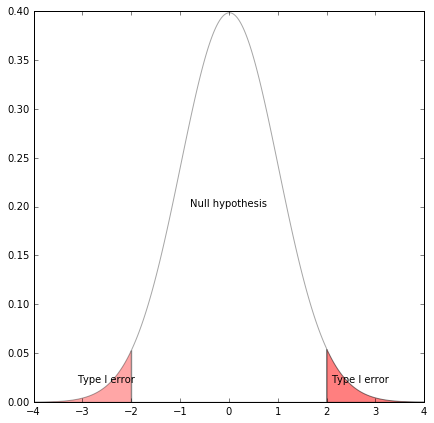

In [11]:
# Type I error
plt.figure(figsize=(7,7))

plt.fill_between(x=np.arange(-4,-2,0.01),
                 y1 = stats.norm.pdf(np.arange(-4,-2,0.01)),
                 facecolor='red',
                 alpha=0.35)  # 颜色浓度，0.1是粉红色，0.9是大红色

plt.fill_between(x=np.arange(-2,2,0.01),
                 y1=stats.norm.pdf(np.arange(-2,2,0.01)),
                 facecolor='white',
                 alpha=0.35)
                 
plt.fill_between(x=np.arange(2,4,0.01),
                 y1=stats.norm.pdf(np.arange(2,4,0.01)),
                 facecolor='red',
                 alpha=0.5)
plt.text(x=-0.8,y=0.2,s='Null hypothesis')
plt.text(x=-3.1,y=0.02,s='Type I error')
plt.text(x=2.1,y=0.02,s='Type I error')

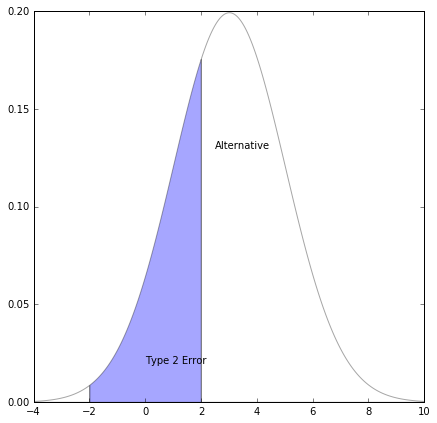

In [12]:
# Type II error:
plt.figure(figsize=(7,7))

plt.fill_between(x=np.arange(-4,-2,0.01),
                 y1=stats.norm.pdf(np.arange(-4,-2,0.01),loc=3,scale=2),
                 facecolor='white',
                 alpha=0.35)
                 
plt.fill_between(x=np.arange(-2,2,0.01),
                 y1 = stats.norm.pdf(np.arange(-2,2,0.01),loc=3,scale=2),
                 facecolor='blue',
                 alpha=0.35)
plt.fill_between(x=np.arange(2,10,0.01),
                 y1=stats.norm.pdf(np.arange(2,10,0.01),loc=3,scale=2),
                  facecolor='white',
                 alpha=0.35)

plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=0, y=0.02, s= "Type 2 Error")

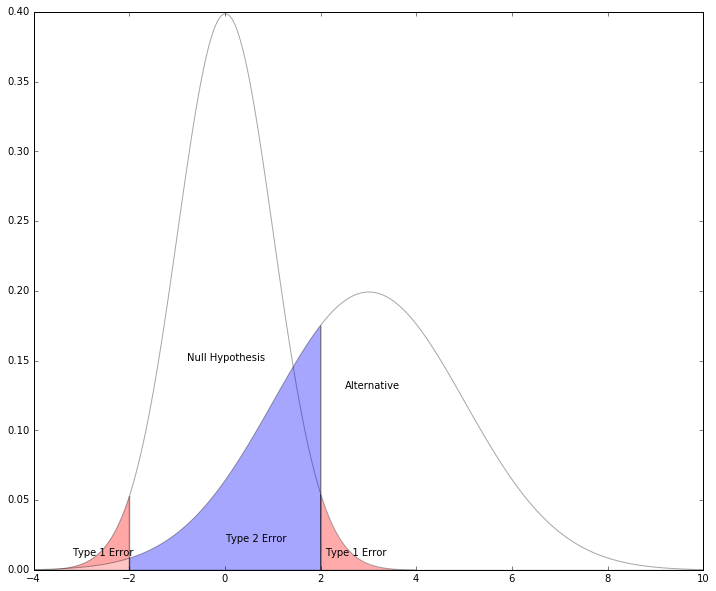

In [13]:
# 合起来：

plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

## wrap up

T-test 研究样本和总体均值的差异。T-test对数值变量起作用，下一章讨论对分类变量的统计检验。